### With much thanks to Virgile Fritsch <virgile.fritsch@inria.fr> for getting me started with [http://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_housing.html](http://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_housing.html)

In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Enable inline plotting - comment out and re-run to get some plots with useful interaction
%matplotlib inline

In [2]:
# Define "classifiers" to be used.  Should do some further experimentation with the parameters 'contamination',
# 'nu' and 'gamma'

classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}

In [3]:
Location = r'C:\Users\Kaz\OneDrive\FICO\power1000\power1000.csv'
df = pd.read_csv(Location, header=0, index_col='TimestampUTC', parse_dates=True, dayfirst=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2015-03-01 01:00:00 to 2015-03-11 11:00:00
Data columns (total 59 columns):
Meter                                                      999 non-null object
LocalTimeStamp                                             999 non-null object
ActivePower                                                909 non-null float64
ApparentPower                                              908 non-null float64
ReactivePower                                              908 non-null float64
ActivePowerMean                                            0 non-null float64
ApparentPowerMean                                          0 non-null float64
ReactivePowerMean                                          0 non-null float64
ActivePowerSlidingWindowDemandDelivered_Received           908 non-null float64
ApparentPowerSlidingWindowDemandDelivered_and_Received     908 non-null float64
ReactivePowerSlidingWindowDemandDelivered_Received         908 non

In [5]:
df.head()

,Meter,LocalTimeStamp,ActivePower,ApparentPower,ReactivePower,ActivePowerMean,ApparentPowerMean,ReactivePowerMean,ActivePowerSlidingWindowDemandDelivered_Received,ApparentPowerSlidingWindowDemandDelivered_and_Received,...,PowerFactorSigned,PowerFactorUnsigned,PowerFactorMean,VoltageTotalHarmonicDistortionMeanonInputV1,VoltageTotalHarmonicDistortionMeanonInputV2,VoltageTotalHarmonicDistortionMeanonInputV3,CurrentTotalHarmonicDistortionPhaseAMean,CurrentTotalHarmonicDistortionPhaseBMean,CurrentTotalHarmonicDistortionPhaseCMean,Source
TimestampUTC,,,,,,,,,,,,,,,,,,,,,
2015-03-01 01:00:00,AH_BB34.BB_AH12_4,2015-03-01 12:00:00.0,2.258378,2.266474,0.341068,NaN,NaN,NaN,2.206607,2.229658,...,NaN,0.988613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...
2015-03-01 01:15:00,AH_BB34.BB_AH12_4,2015-03-01 12:15:00.0,2.137901,2.315815,0.377843,NaN,NaN,NaN,2.202845,2.225894,...,NaN,0.986600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...
2015-03-01 01:30:00,AH_BB34.BB_AH12_4,2015-03-01 12:30:00.0,2.159653,2.206704,0.369738,NaN,NaN,NaN,2.202088,2.226025,...,NaN,0.985863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...
2015-03-01 01:45:00,AH_BB34.BB_AH12_4,2015-03-01 12:45:00.0,2.274856,2.231020,0.295118,NaN,NaN,NaN,2.205782,2.230594,...,NaN,0.991213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...
2015-03-01 02:00:00,AH_BB34.BB_AH12_4,2015-03-01 01:00:00.0,2.298314,2.310940,0.328133,NaN,NaN,NaN,2.207844,2.232934,...,NaN,0.989868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...


In [6]:
df.tail()

,Meter,LocalTimeStamp,ActivePower,ApparentPower,ReactivePower,ActivePowerMean,ApparentPowerMean,ReactivePowerMean,ActivePowerSlidingWindowDemandDelivered_Received,ApparentPowerSlidingWindowDemandDelivered_and_Received,...,PowerFactorSigned,PowerFactorUnsigned,PowerFactorMean,VoltageTotalHarmonicDistortionMeanonInputV1,VoltageTotalHarmonicDistortionMeanonInputV2,VoltageTotalHarmonicDistortionMeanonInputV3,CurrentTotalHarmonicDistortionPhaseAMean,CurrentTotalHarmonicDistortionPhaseBMean,CurrentTotalHarmonicDistortionPhaseCMean,Source
TimestampUTC,,,,,,,,,,,,,,,,,,,,,
2015-03-11 10:00:00,AH_BB34.BB_AH12_4,2015-03-11 09:00:00.0,2.072091,2.217005,0.332847,NaN,NaN,NaN,2.123436,2.151715,...,NaN,0.988666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...
2015-03-11 10:15:00,AH_BB34.BB_AH12_4,2015-03-11 09:15:00.0,2.098531,2.164206,0.314978,NaN,NaN,NaN,2.125749,2.156233,...,NaN,0.989352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...
2015-03-11 10:30:00,AH_BB34.BB_AH12_4,2015-03-11 09:30:00.0,2.134093,2.123161,0.325995,NaN,NaN,NaN,2.114667,2.141521,...,NaN,0.988142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...
2015-03-11 10:45:00,AH_BB34.BB_AH12_4,2015-03-11 09:45:00.0,2.133127,2.149923,0.343145,NaN,NaN,NaN,2.118556,2.145661,...,NaN,0.987181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...
2015-03-11 11:00:00,AH_BB34.BB_AH12_4,2015-03-11 10:00:00.0,2.118119,2.134655,0.360598,NaN,NaN,NaN,2.117373,2.144690,...,NaN,0.985629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/work/emea2/42817/data/power_data/ION_Data-Sch...


In [7]:
df.describe()

,ActivePower,ApparentPower,ReactivePower,ActivePowerMean,ApparentPowerMean,ReactivePowerMean,ActivePowerSlidingWindowDemandDelivered_Received,ApparentPowerSlidingWindowDemandDelivered_and_Received,ReactivePowerSlidingWindowDemandDelivered_Received,ActivePowerPhaseA,...,CurrentUnbalanceMean,PowerFactorSigned,PowerFactorUnsigned,PowerFactorMean,VoltageTotalHarmonicDistortionMeanonInputV1,VoltageTotalHarmonicDistortionMeanonInputV2,VoltageTotalHarmonicDistortionMeanonInputV3,CurrentTotalHarmonicDistortionPhaseAMean,CurrentTotalHarmonicDistortionPhaseBMean,CurrentTotalHarmonicDistortionPhaseCMean
count,909.000000,908.000000,908.000000,0,0,0,908.000000,908.000000,908.000000,908.000000,...,0,0,908.000000,0,0,0,0,0,0,0
mean,2.221989,2.248373,0.323219,NaN,NaN,NaN,2.226851,2.250692,0.321327,1.082871,...,NaN,NaN,0.989195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.134588,0.145004,0.057449,NaN,NaN,NaN,0.133609,0.132572,0.046552,0.064119,...,NaN,NaN,0.003885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.966251,1.977754,0.125700,NaN,NaN,NaN,2.047904,2.083414,0.161266,0.864126,...,NaN,NaN,0.970320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.166181,2.196387,0.289698,NaN,NaN,NaN,2.204047,2.222025,0.287429,1.049469,...,NaN,NaN,0.987181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.215994,2.242212,0.327467,NaN,NaN,NaN,2.219588,2.244699,0.331960,1.097080,...,NaN,NaN,0.989367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.259238,2.283548,0.357425,NaN,NaN,NaN,2.232835,2.257055,0.347479,1.125391,...,NaN,NaN,0.991713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3.424118,3.401382,0.725297,NaN,NaN,NaN,3.345904,3.359944,0.711348,1.209153,...,NaN,NaN,0.998545,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In Derek's notes the fields chosen for analysis are: 'ActivePower', 'ReactivePower', 'ReactivePowerSlidingWindowDemandDelivered_Received', 'ActiveEnergyDelivered_Received', 'ReactiveEnergyDelivered', 'AverageVoltageLinetoLine', 'AverageVoltageLinetoNeutral', 'Frequency', 'CurrentPhaseAverage', 'PowerFactorUnsigned' and 'CurrentTotalHarmonicDistortionPhaseAMean'.

'TimestampUTC' is taken as an index

You will note, however, that for this relatively small sample many of these fields do not contain any useful values, so this list is pruned to leave populated fields only.

When the full data become available we will revert to the original list of selected fields.

In [8]:
fieldsToUse = np.array([2, 4, 10, 18, 30, 38, 40, 43, 46, 50, 55])
dfSelected = df[fieldsToUse[:]]
dfSelected.describe()

,ActivePower,ReactivePower,ReactivePowerSlidingWindowDemandDelivered_Received,ActiveEnergyDelivered_Received,ReactiveEnergyDelivered,AverageVoltageLinetoLine,AverageVoltageLinetoNeutral,Frequency,CurrentPhaseAverage,PowerFactorUnsigned,CurrentTotalHarmonicDistortionPhaseAMean
count,909.000000,908.000000,908.000000,0,0,908.000000,908.000000,908.000000,908.000000,908.000000,0
mean,2.221989,0.323219,0.321327,NaN,NaN,430.009199,248.265082,50.006992,3.681727,0.989195,NaN
std,0.134588,0.057449,0.046552,NaN,NaN,2.462163,1.419750,0.055807,0.190614,0.003885,NaN
min,1.966251,0.125700,0.161266,NaN,NaN,419.437378,242.249512,49.863441,3.270701,0.970320,NaN
25%,2.166181,0.289698,0.287429,NaN,NaN,428.365219,247.314407,49.968397,3.605571,0.987181,NaN
50%,2.215994,0.327467,0.331960,NaN,NaN,430.129181,248.386246,50.001839,3.676050,0.989367,NaN
75%,2.259238,0.357425,0.347479,NaN,NaN,431.578400,249.151718,50.045205,3.736302,0.991713,NaN
max,3.424118,0.725297,0.711348,NaN,NaN,438.405212,253.310883,50.170090,5.215664,0.998545,NaN


Here we will apply the ``` dropna() ``` function.

Always worth trying to understand why the **```NaN```**s occur.

In [9]:
fieldsToUse = np.array([2, 4, 10, 38, 40, 43, 46, 50])
dfSelected = df[fieldsToUse[:]].dropna()
dfSelected.describe()

,ActivePower,ReactivePower,ReactivePowerSlidingWindowDemandDelivered_Received,AverageVoltageLinetoLine,AverageVoltageLinetoNeutral,Frequency,CurrentPhaseAverage,PowerFactorUnsigned
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.222026,0.323219,0.321327,430.009199,248.265082,50.006992,3.681727,0.989195
std,0.134657,0.057449,0.046552,2.462163,1.419750,0.055807,0.190614,0.003885
min,1.966251,0.125700,0.161266,419.437378,242.249512,49.863441,3.270701,0.970320
25%,2.166083,0.289698,0.287429,428.365219,247.314407,49.968397,3.605571,0.987181
50%,2.216001,0.327467,0.331960,430.129181,248.386246,50.001839,3.676050,0.989367
75%,2.259253,0.357425,0.347479,431.578400,249.151718,50.045205,3.736302,0.991713
max,3.424118,0.725297,0.711348,438.405212,253.310883,50.170090,5.215664,0.998545


##### The following cell is for some diagnostics / sandpit:

In [10]:
X3 = dfSelected.values[:, [2, 5]]
X3
delta0 = max(X3[:,0])-min(X3[:,0])
delta0
delta1 = max(X3[:,1])-min(X3[:,1])
delta1
np.mean(X3[:,0])
dfSelected.columns.values[2]
#plt.figure(1)
#plt.scatter(X3[:, 0], X3[:, 1], color='red')
np.percentile(X3[:, 0],[25,50,75])
#np.percentile(X3[:, 0],75)
(x1,x2,y1,y2)=(2,3,4,5)
df[df.columns.values[2]+'_Upper_Outliers'] = 0.5*(1+np.sign(df[df.columns.values[2]]-2.7))
#df[df.columns.values[2]+'_Upper_Outliers']

#### Run the 2-dimensional Plotting
Added to the covariance and SVM contours are univariate outlier boundaries as defined using box-plots, except that in this case outliers are defined by UQ + (2*IQR) or LQ - (2*IQR) rather than the usual UQ + (1.5*IQR) or LQ - (1.5*IQR).

Also added are bi-variate outlier boundaries where the outliers may hide behind orthogonal propjections.  Examples can be found in Figures 6, 13, 18, 19 and 28.

New flags have been added to the database indicating the outliers separated off in each of the figures.  These appear in the summary statistics which follow the graphs.

Computing for fields 'ActivePower' and 'ReactivePower'


C:\Users\Kaz\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


Computing for fields 'ActivePower' and 'ReactivePowerSlidingWindowDemandDelivered_Received'
Computing for fields 'ActivePower' and 'AverageVoltageLinetoLine'
Computing for fields 'ActivePower' and 'AverageVoltageLinetoNeutral'
Computing for fields 'ActivePower' and 'Frequency'
Computing for fields 'ActivePower' and 'CurrentPhaseAverage'
Computing for fields 'ActivePower' and 'PowerFactorUnsigned'
------
Computing for fields 'ReactivePower' and 'ReactivePowerSlidingWindowDemandDelivered_Received'
Computing for fields 'ReactivePower' and 'AverageVoltageLinetoLine'
Computing for fields 'ReactivePower' and 'AverageVoltageLinetoNeutral'
Computing for fields 'ReactivePower' and 'Frequency'
Computing for fields 'ReactivePower' and 'CurrentPhaseAverage'
Computing for fields 'ReactivePower' and 'PowerFactorUnsigned'
------
Computing for fields 'ReactivePowerSlidingWindowDemandDelivered_Received' and 'AverageVoltageLinetoLine'
Computing for fields 'ReactivePowerSlidingWindowDemandDelivered_Recei

C:\Users\Kaz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Computing for fields 'AverageVoltageLinetoLine' and 'PowerFactorUnsigned'
------
Computing for fields 'AverageVoltageLinetoNeutral' and 'Frequency'
Computing for fields 'AverageVoltageLinetoNeutral' and 'CurrentPhaseAverage'
Computing for fields 'AverageVoltageLinetoNeutral' and 'PowerFactorUnsigned'
------
Computing for fields 'Frequency' and 'CurrentPhaseAverage'
Computing for fields 'Frequency' and 'PowerFactorUnsigned'
------
Computing for fields 'CurrentPhaseAverage' and 'PowerFactorUnsigned'
------
------


C:\Users\Kaz\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


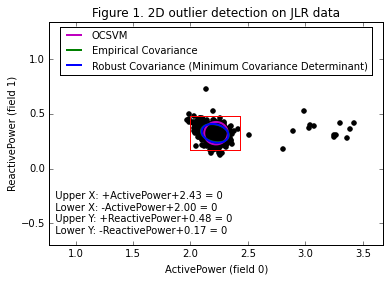

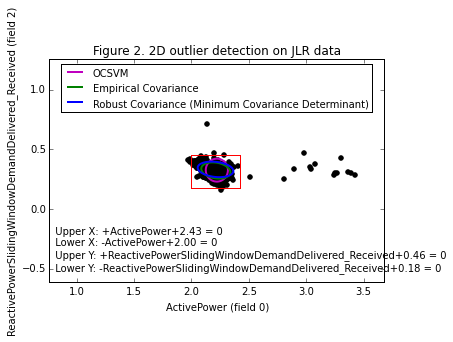

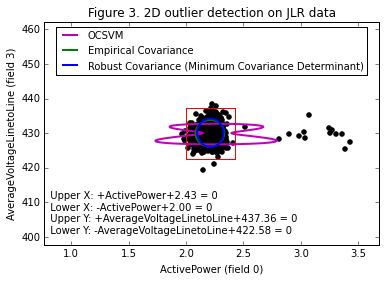

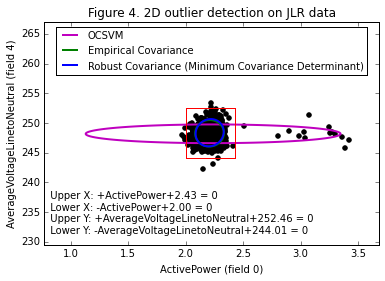

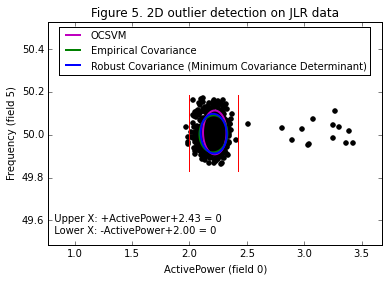

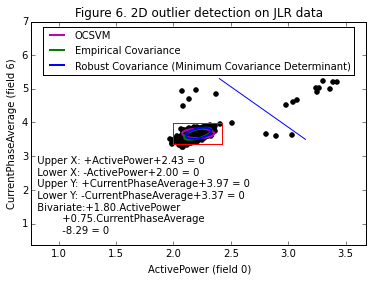

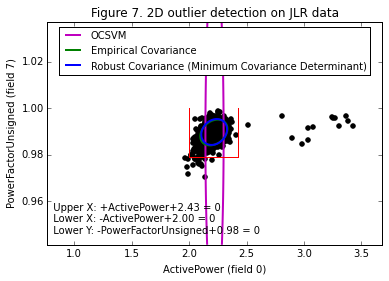

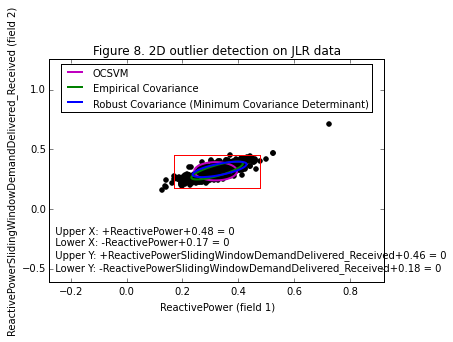

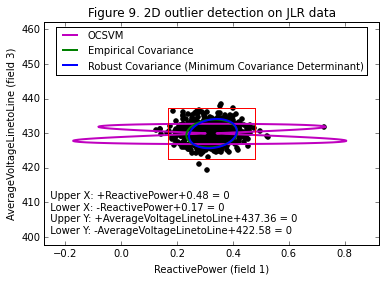

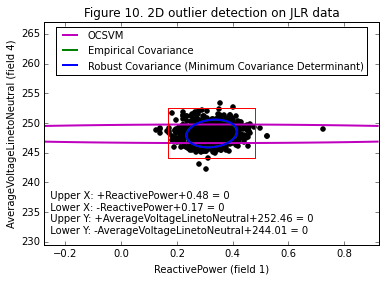

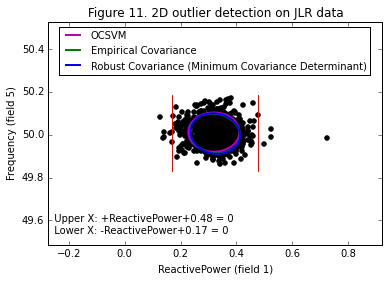

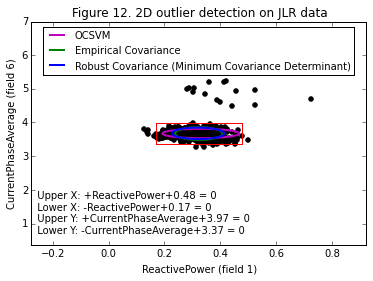

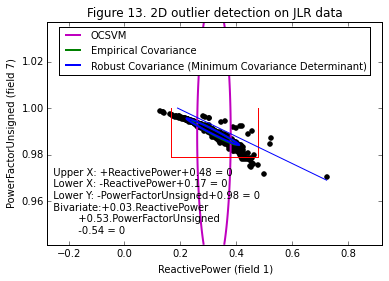

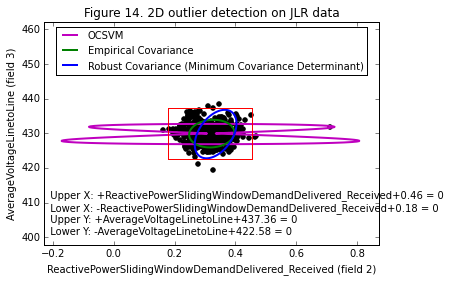

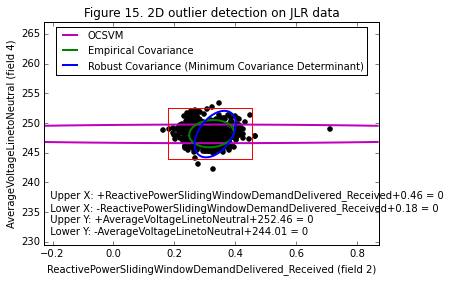

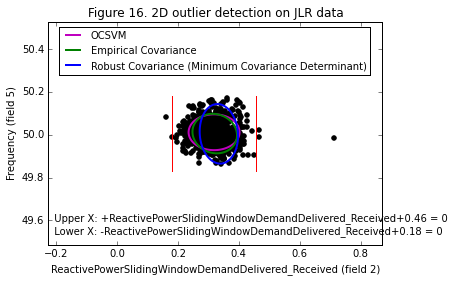

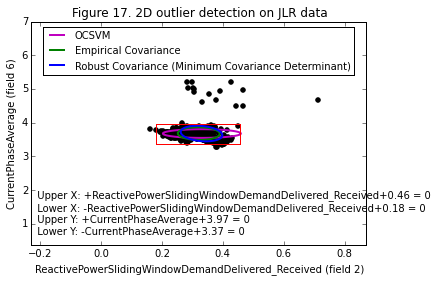

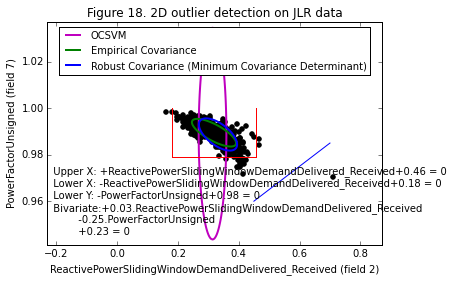

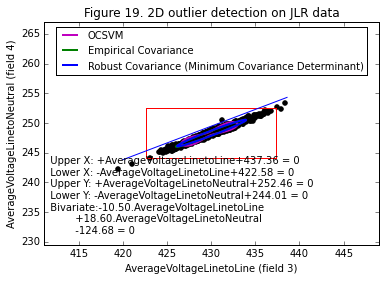

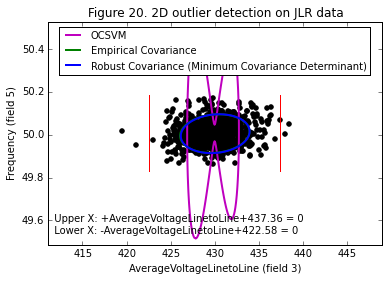

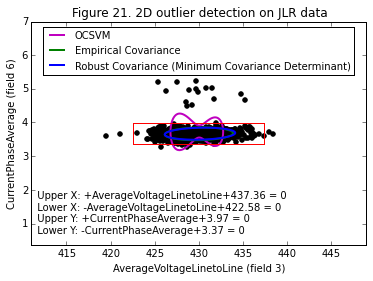

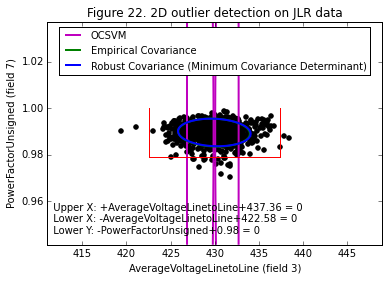

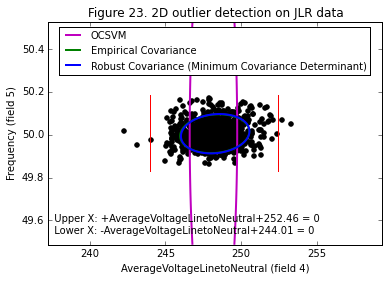

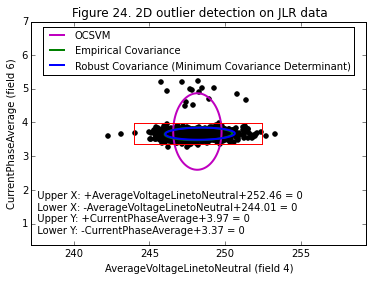

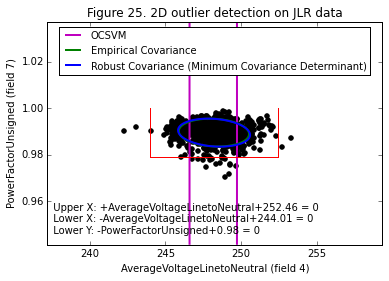

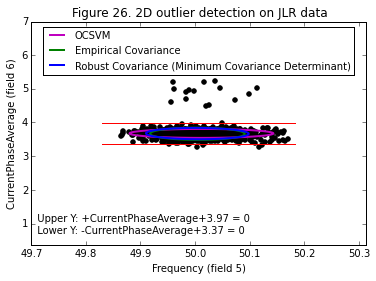

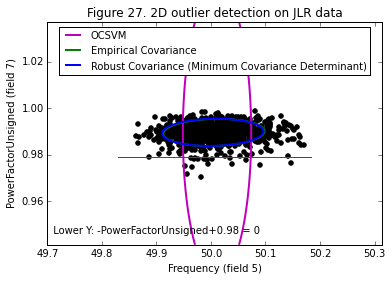

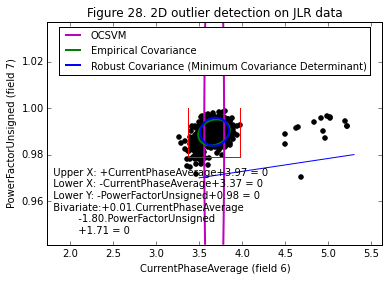

In [11]:
figNumber = 1   # initialise graph/figure count
contourMapResolution = 500
for i in range(0,len(fieldsToUse)):
    for j in range(i+1,len(fieldsToUse)):
        X3 = dfSelected.values[:, [i, j]]    # Get data
        if ((max(X3[:,0])-min(X3[:,0])<0.000001) or (max(X3[:,1])-min(X3[:,1])<0.000001)):
            print("One Dimensional")
        else:
            if ((i >= 0) and (j >= 1)):
                print("Computing for fields \'"+dfSelected.columns.values[i]+"\' and \'"+dfSelected.columns.values[j]+"\'")
                min0 = min(X3[:,0])
                max0 = max(X3[:,0])
                min1 = min(X3[:,1])
                max1 = max(X3[:,1])
                delta0 = max0-min0
                delta1 = max1-min1
                if (delta0 > delta1):
                    delta = delta0
                else:
                    delta = delta1
                newMin0 = np.mean(X3[:,0])-delta0
                newMin1 = np.mean(X3[:,1])-(1.7*delta1)   # extra head room for threshold equations
                newMax0 = np.mean(X3[:,0])+delta0
                newMax1 = np.mean(X3[:,1])+(1.7*delta1)   # extra head room for the legend
                #print("Lower plotting limit:",newMin0,newMin1)
                #print("Minima:",min(X3[:,0]),min(X3[:,1]))
                #print("Data:",X3[:,[0,1]])
                #print("Maxima:",max(X3[:,0]),max(X3[:,1]))
                #print("Upper plotting limit:",newMax0,newMax1)
                # Learn a frontier for outlier detection with several classifiers
                xx, yy = np.meshgrid(np.linspace(newMin0, newMax0, contourMapResolution), np.linspace(newMin1, newMax1, contourMapResolution))
                for k, (clf_name, clf) in enumerate(classifiers.items()):
                    #print ("\tUsing " + clf_name)
                    plt.figure(figNumber)
                    try:
                        clf.fit(X3)
                        Z3 = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                        Z3 = Z3.reshape(xx.shape)
                    except ValueError:
                        print ("\t\tWARNING:  Singular matrix.  Inserting a zero plane instead for fields \'"+dfSelected.columns.values[i]+"\' and \'"+dfSelected.columns.values[j]+"\'")
                        Z3 = np.zeros((contourMapResolution, contourMapResolution))
                    legend1[clf_name] = plt.contour(xx, yy, Z3, levels=[0], linewidths=2, colors=colors[k])
                legend1_values_list = list( legend1.values() )
                legend1_keys_list = list( legend1.keys() )
                # Plot the results (= shape of the data points cloud)
                plt.figure(figNumber)  # two clusters
                plt.title("Figure "+str(figNumber)+". 2D outlier detection on JLR data")
                plt.scatter(X3[:, 0], X3[:, 1], color='black')
                plt.xlim((xx.min(), xx.max()))
                plt.ylim((yy.min(), yy.max()))
                plt.legend((legend1_values_list[0].collections[0],
                            legend1_values_list[1].collections[0],
                            legend1_values_list[2].collections[0]),
                           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
                           loc="upper center",
                           prop=matplotlib.font_manager.FontProperties(size=10))
                xFieldLabel = dfSelected.columns.values[i]+" (field "+str(i)+")"
                yFieldLabel = dfSelected.columns.values[j]+" (field "+str(j)+")"
                plt.xlabel(xFieldLabel)
                plt.ylabel(yFieldLabel)
                boxplotWhiskerExtender = 1.8  # is usually 1.5 * (uq0-lq0) but 1.8 * (uq0-lq0) seemed
                                              #   to yield a more reasonable number of outliers
                lq0 = np.percentile(X3[:, 0],25)
                uq0 = np.percentile(X3[:, 0],75)
                lw0 = lq0 - (boxplotWhiskerExtender*(uq0-lq0))  
                uw0 = uq0 + (boxplotWhiskerExtender*(uq0-lq0))  
                lq1 = np.percentile(X3[:, 1],25)
                uq1 = np.percentile(X3[:, 1],75)
                lw1 = lq1 - (boxplotWhiskerExtender*(uq1-lq1))
                uw1 = uq1 + (boxplotWhiskerExtender*(uq1-lq1))
                annotateString = "  "   ###  for capturing univariate equations to split off outliers
                if (max0 > uw0):
                    plt.plot([uw0,uw0],[lw1,uw1], color='red')
                    annotateString = annotateString+"Upper X: +"+dfSelected.columns.values[i]+'{:+.2f}'.format(uw0)+" = 0\n  "
                    dfSelected[dfSelected.columns.values[i]+'_Uni_Upper_Outliers'] = 0.5*(1.0+np.sign(X3[:, 0]-uw0))
                if (min0 < lw0):
                    plt.plot([lw0,lw0],[lw1,uw1], color='red')
                    annotateString = annotateString+"Lower X: -"+dfSelected.columns.values[i]+'{:+.2f}'.format(lw0)+" = 0\n  "
                    dfSelected[dfSelected.columns.values[i]+'_Uni_Lower_Outliers'] = 0.5*(1.0+np.sign(0.0-X3[:, 0]+lw0))
                if (max1 > uw1):
                    plt.plot([lw0,uw0],[uw1,uw1], color='red')
                    annotateString = annotateString+"Upper Y: +"+dfSelected.columns.values[j]+'{:+.2f}'.format(uw1)+" = 0\n  "
                    dfSelected[dfSelected.columns.values[j]+'_Uni_Upper_Outliers'] = 0.5*(1.0+np.sign(X3[:, 1]-uw1))
                if (min1 < lw1):
                    plt.plot([lw0,uw0],[lw1,lw1], color='red')
                    annotateString = annotateString+"Lower Y: -"+dfSelected.columns.values[j]+'{:+.2f}'.format(lw1)+" = 0\n  "
                    dfSelected[dfSelected.columns.values[j]+'_Uni_Lower_Outliers'] = 0.5*(1.0+np.sign(0.0-X3[:, 1]+lw1))
                if (figNumber in ([6, 13, 18, 19, 28])):
                    if (figNumber == 6):
                        (x1,x2,y1,y2)=(2.4,3.15,5.3,3.5)
                    if (figNumber == 13):
                        (x1,x2,y1,y2)=(0.19,0.724,1.00,0.969)
                    if (figNumber == 18):
                        (x1,x2,y1,y2)=(0.7,0.45,0.985,0.96)
                    if (figNumber == 19):
                        (x1,x2,y1,y2)=(420,438.6,243.8,254.3)
                    if (figNumber == 28):
                        (x1,x2,y1,y2)=(5.3,3.5,0.98,0.97)
                    plt.plot([x1, x2], [y1, y2], color='blue')
                    (dx,dy) = (x2-x1,y2-y1)
                    cdx = ((y1*dx)-(x1*dy) + (y2*dx)-(x2*dy))/2.0
                    (w2,w1,w0) = (dx,0-dy,0-cdx)
                    annotateString = annotateString + "Bivariate:"+'{:+.2f}'.format(w1) + "." + dfSelected.columns.values[i] + "\n" \
                                                    + "          "+'{:+.2f}'.format(w2) + "." + dfSelected.columns.values[j] + "\n" \
                                                    + "          "+'{:+.2f}'.format(w0) + " = 0\n  "
                    dfSelected[dfSelected.columns.values[i]+'_Bi_Lower_Outliers'] = 0.5*(1.0+np.sign((X3[:, 1]*w2)+(X3[:, 0]*w1)+w0))
                    dfSelected[dfSelected.columns.values[j]+'_Bi_Lower_Outliers'] = dfSelected[dfSelected.columns.values[i]+'_Bi_Lower_Outliers']
                plt.annotate(annotateString, xy=(lw0, lw1),
                             xycoords="data", textcoords="data",
                             xytext=(newMin0, newMin1))
                           
                figNumber += 1
    print("------")
plt.show()

Expand out the datetime index.  This may give some insight as to why the outliers exist.

In [12]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 
                 'Sunday'])
dfSelected['Weekday'] = days[dfSelected.index.weekday]
weekend = np.array([False, False, False, 
                    False, False, True, 
                    True])
dfSelected['Weekend'] = weekend[dfSelected.index.weekday]
months = np.array(['Jan', 'Feb', 'Mar', 
                   'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 
                   'Oct', 'Nov', 'Dec'])
dfSelected['Month'] = months[dfSelected.index.month-1]
# dfSelected['Month']
dfSelected['DayOfMonth'] = dfSelected.index.day
# dfSelected['DayOfMonth']
dfSelected['WeekOfYear'] = dfSelected.index.week
dfSelected['Year'] = dfSelected.index.year
dfSelected['Quarter'] = dfSelected.index.quarter
dfSelected['Hour'] = dfSelected.index.hour
dfSelected['Minute'] = dfSelected.index.minute
# dfSelected.index.minute
dfSelected.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 908 entries, 2015-03-01 01:00:00 to 2015-03-11 11:00:00
Data columns (total 37 columns):
ActivePower                                                              908 non-null float64
ReactivePower                                                            908 non-null float64
ReactivePowerSlidingWindowDemandDelivered_Received                       908 non-null float64
AverageVoltageLinetoLine                                                 908 non-null float64
AverageVoltageLinetoNeutral                                              908 non-null float64
Frequency                                                                908 non-null float64
CurrentPhaseAverage                                                      908 non-null float64
PowerFactorUnsigned                                                      908 non-null float64
ActivePower_Uni_Upper_Outliers                                           908 non-null float64
ActivePower_

New summary statistics

In [13]:
dfSelected.describe()

,ActivePower,ReactivePower,ReactivePowerSlidingWindowDemandDelivered_Received,AverageVoltageLinetoLine,AverageVoltageLinetoNeutral,Frequency,CurrentPhaseAverage,PowerFactorUnsigned,ActivePower_Uni_Upper_Outliers,ActivePower_Uni_Lower_Outliers,...,ReactivePowerSlidingWindowDemandDelivered_Received_Bi_Lower_Outliers,AverageVoltageLinetoLine_Bi_Lower_Outliers,AverageVoltageLinetoNeutral_Bi_Lower_Outliers,Weekend,DayOfMonth,WeekOfYear,Year,Quarter,Hour,Minute
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,...,908.000000,908.000000,908.000000,908,908.000000,908.000000,908,908,908.000000,908.000000
mean,2.222026,0.323219,0.321327,430.009199,248.265082,50.006992,3.681727,0.989195,0.015419,0.004405,...,0.001101,0.001101,0.001101,0.312775,5.419604,10.060573,2015,1,6.462555,22.533040
std,0.134657,0.057449,0.046552,2.462163,1.419750,0.055807,0.190614,0.003885,0.123278,0.066262,...,0.033186,0.033186,0.033186,0.463879,2.954101,0.509738,0,0,3.427261,16.794497
min,1.966251,0.125700,0.161266,419.437378,242.249512,49.863441,3.270701,0.970320,0.000000,0.000000,...,0.000000,0.000000,0.000000,False,1.000000,9.000000,2015,1,1.000000,0.000000
25%,2.166083,0.289698,0.287429,428.365219,247.314407,49.968397,3.605571,0.987181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,3.000000,10.000000,2015,1,3.000000,11.250000
50%,2.216001,0.327467,0.331960,430.129181,248.386246,50.001839,3.676050,0.989367,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,5.000000,10.000000,2015,1,6.000000,30.000000
75%,2.259253,0.357425,0.347479,431.578400,249.151718,50.045205,3.736302,0.991713,0.000000,0.000000,...,0.000000,0.000000,0.000000,1,8.000000,10.000000,2015,1,9.000000,45.000000
max,3.424118,0.725297,0.711348,438.405212,253.310883,50.170090,5.215664,0.998545,1.000000,1.000000,...,1.000000,1.000000,1.000000,True,11.000000,11.000000,2015,1,12.000000,45.000000
